# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [23]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [24]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [25]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [26]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [27]:
# Your code here :
from sklearn.model_selection import train_test_split

X = data.drop(columns='MEDV')
y = data.MEDV  

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [55]:
# Your code here :
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)  
pre_test=model.predict(X_test)
pre_train=model.predict(X_train)
print(f"prediction test: {pre_test} \n\nprediction train: {pre_train}")

prediction test: [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548695  8.87931901 20.830769

## 3. Calculate and print R-squared for both the training and the testing set.

In [84]:
# Your code here :
from sklearn.metrics import r2_score

r_test=r2_score(y_test,pre_test)
r_train=r2_score(y_train,pre_train)
print(f"r2_score test: {r_test} \nr2_score train: {r_train}")

r2_score test: 1.0 
r2_score train: 0.9620213102647959


## 4. Calculate and print mean squared error for both the training and the testing set.

In [83]:
# Your code here :
from sklearn.metrics import mean_squared_error

r_test=mean_squared_error(y_test,pre_test)
r_train=mean_squared_error(y_train,pre_train)
print(f"mean_squared_error test: {r_test} \nmean_squared_error train: {r_train}")

mean_squared_error test: 0.0 
mean_squared_error train: 0.025


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [82]:
# Your code here :
from sklearn.metrics import mean_absolute_error

r_test=mean_absolute_error(y_test,pre_test)
r_train=mean_absolute_error(y_train,pre_train)
print(f"mean_absolute_error test: {r_test} \nmean_absolute_error train: {r_train}")

mean_absolute_error test: 0.0 
mean_absolute_error train: 0.025


## Classification Model Evaluation

In [32]:
from sklearn.datasets import load_iris
data = load_iris()

In [33]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [34]:
column_names = data.feature_names

In [35]:
df = pd.DataFrame(data['data'],columns=column_names)

In [36]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
target = pd.DataFrame(data.target)

In [38]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [71]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [73]:
# Your code here :
from sklearn.model_selection import train_test_split

X = df
y = data['target']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [74]:
# Your code here :
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)  
pre_test=model.predict(X_test)
pre_train=model.predict(X_train)
print(f"prediction test: {pre_test} \n\nprediction train: {pre_train}")


prediction test: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] 

prediction train: [0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 2 0 2 0 0 2 1 2 2 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [86]:
# Your code here :
from sklearn.metrics import accuracy_score

accuracy_score_test=accuracy_score(y_test,pre_test)
accuracy_score_train=accuracy_score(y_train,pre_train)
print(f"accuracy_score test: {accuracy_score_test} \naccuracy_score train: {accuracy_score_train}")


accuracy_score test: 1.0 
accuracy_score train: 0.975


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [87]:
# Your code here :
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score_test=balanced_accuracy_score(y_test,pre_test)
balanced_accuracy_score_train=balanced_accuracy_score(y_train,pre_train)
print(f"balanced_accuracy_score test: {balanced_accuracy_score_test} \nbalanced_accuracy_score train: {balanced_accuracy_score_train}")

balanced_accuracy_score test: 1.0 
balanced_accuracy_score train: 0.975609756097561


## 10. Calculate and print the precision score for both the training and the testing set.

In [88]:
# Your code here :
from sklearn.metrics import precision_score

train_precision = precision_score(y_train, pre_train, average="macro")
test_precision = precision_score(y_test, pre_test, average="macro")
print(f"balanced_accuracy_score test: {test_precision} \nbalanced_accuracy_score train: {train_precision}")

balanced_accuracy_score test: 1.0 
balanced_accuracy_score train: 0.9761904761904763


## 11. Calculate and print the recall score for both the training and the testing set.

In [89]:
# Your code here :
from sklearn.metrics import recall_score

train_precision = recall_score(y_train, pre_train, average="macro")
test_precision = recall_score(y_test, pre_test, average="macro")
print(f"recall_score test: {test_precision} \nrecall_score train: {train_precision}")

recall_score test: 1.0 
recall_score train: 0.975609756097561


## 12. Calculate and print the F1 score for both the training and the testing set.

In [90]:
# Your code here :
from sklearn.metrics import f1_score

# Compute F1 Score with macro averaging (adjust if needed)
train_f1 = f1_score(y_train, pre_train, average="macro")
test_f1 = f1_score(y_test, pre_test, average="macro")

print(f"f1_score test: {train_f1} \nf1_score train: {test_f1}")


f1_score test: 0.974996093139553 
f1_score train: 1.0


## 13. Generate confusion matrices for both the training and the testing set.

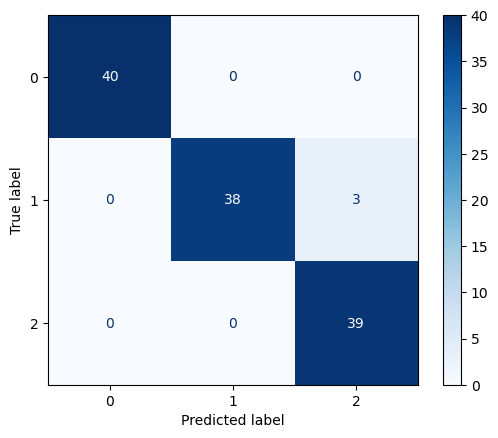

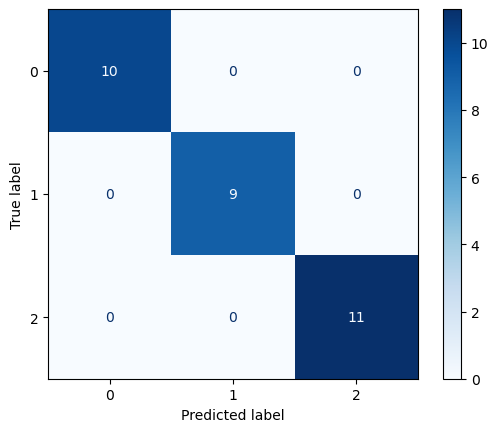

In [97]:
# Your code here :
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

train_confusion_matrix = confusion_matrix(y_train, pre_train)
test_confusion_matrix = confusion_matrix(y_test, pre_test)

ConfusionMatrixDisplay(train_confusion_matrix).plot(cmap="Blues");
ConfusionMatrixDisplay(test_confusion_matrix).plot(cmap="Blues");




## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [ ]:
# Have fun here !
